<a href="https://colab.research.google.com/github/OswaldoMoper/Mathematical_Data_Analysis/blob/master/Data%20Analysis/Analysis_3_4_(_Classificators_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [ ]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
species_count = iris.species.value_counts().reset_index()
species_count.columns = ['Especie', 'Cuenta']
fig = px.bar( species_count, x = 'Especie', y = 'Cuenta', color = 'Especie', text = 'Cuenta', title = 'Distribución por Especie', template = 'plotly_dark' )
fig.show()

In [ ]:
fig2 = go.Figure()
for feature in iris.columns[:-1]:
  fig2.add_trace( go.Box ( y = iris[feature], x = iris.species, name = feature ) )
fig2.update_layout( title = 'Grafico de Caja por Característica', xaxis_title = 'Especie', yaxis_title = 'Valor', template = 'plotly_dark' )
fig2.show()

In [ ]:
figsm = px.scatter_matrix( iris, dimensions = iris.columns[:-1], color = 'species', template = 'plotly_dark' )
figsm.update_traces( diagonal_visible = False )
figsm.update_layout( title = 'Pares de Características' )
figsm.show()

In [ ]:
X = iris.drop( 'species', axis = 1 )
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#Kmeans

In [ ]:
wcss = []
for k in range(1,11):
  kmeans = KMeans( n_clusters = k, random_state = 42, n_init = 10)
  kmeans.fit(X)
  wcss.append( kmeans.inertia_ )
wcss

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.446182051282065,
 39.03998724608726,
 34.46949589883801,
 30.1865551948052,
 28.28937085137085,
 26.552373141564317]

In [ ]:
figk = go.Figure()
figk.add_trace( go.Scatter( x = list( range( 1, 11 ) ), y = wcss, mode = 'lines+markers', name = 'WCSS' ) )
figk.update_layout( title = 'Método del Codo'
                  , xaxis_title = 'Número de Grupos (k)'
                  , yaxis_title = 'WCSS'
                  , xaxis = dict( tickmode = 'linear', tickvals = list( range( 1, 11 ) ) )
                  , yaxis = dict( rangemode = 'tozero' )
                  , template = 'plotly_dark'
                   )

In [ ]:
silhouette_scores = []

for k in range ( 2, 11 ):
  kmeans = KMeans( n_clusters = k, random_state = 42, n_init = 10)
  cluster_labels = kmeans.fit_predict(X)
  silhouette_scores.append( silhouette_score( X, cluster_labels) )
silhouette_scores

[0.6810461692117465,
 0.5528190123564102,
 0.49805050499728815,
 0.48874888709310654,
 0.36483400396700366,
 0.34974816211612186,
 0.3574536925852728,
 0.33944886363937105,
 0.297314497218599]

In [ ]:
figs = go.Figure()
figs.add_trace( go.Scatter( x = list( range( 2, 11 ) ), y = silhouette_scores, mode = 'lines+markers', name = 'Silhouette Score' ) )
figs.update_layout( title = 'Silhouette Score'
                  , xaxis_title = 'Número de Grupos (k)'
                  , yaxis_title = 'SC'
                  , xaxis = dict( tickmode = 'linear', tickvals = list( range( 2, 22 ) ) )
                  , yaxis = dict( rangemode = 'tozero' )
                  , template = 'plotly_dark'
                   )
figs.show()

In [ ]:
kmeans = KMeans( n_clusters = 3, random_state = 42, n_init = 10)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
iris_c3 = iris.copy()
iris_c3[ 'cluster' ] = kmeans.labels_
iris_c3[ 'cluster' ] = iris_c3.cluster.astype(str)
iris_c3

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
fig3 = px.scatter( iris_c3, x = 'sepal_length', y = 'petal_length', color = 'cluster', template = 'plotly_dark', title = 'Cluster - 3')
fig3.show()

In [ ]:
fig3 = px.scatter( iris_c3, x = 'sepal_length', y = 'petal_length', color = 'species', template = 'plotly_dark', title = 'Cluster - 3')
fig3.show()

In [ ]:
iris_c3.cluster.value_counts()

cluster
0    62
1    50
2    38
Name: count, dtype: int64

In [ ]:
kmeans2 = KMeans( n_clusters = 2, random_state = 42, n_init = 10)
kmeans2.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [ ]:
iris_c2 = iris.copy()
iris_c2[ 'cluster' ] = kmeans2.labels_
iris_c2[ 'cluster' ] = iris_c2.cluster.astype(str)
iris_c2

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [ ]:
figk2 = px.scatter( iris_c2, x = 'sepal_length', y = 'petal_length', color = 'cluster', template = 'plotly_dark', title = 'Cluster - 3')
figk2.show()

In [ ]:
iris_c2.cluster.value_counts()

cluster
0    97
1    53
Name: count, dtype: int64

In [ ]:
iris_comp = iris.copy()
iris_comp[ 'cluster' ] = pd.Series(kmeans.labels_).replace( [ 0, 1, 2 ], [ 'versicolor', 'setosa', 'virginica' ] )
iris_comp[ 'comp' ] =  iris_comp.species == iris_comp.cluster
iris_comp

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,comp
0,5.1,3.5,1.4,0.2,setosa,setosa,True
1,4.9,3.0,1.4,0.2,setosa,setosa,True
2,4.7,3.2,1.3,0.2,setosa,setosa,True
3,4.6,3.1,1.5,0.2,setosa,setosa,True
4,5.0,3.6,1.4,0.2,setosa,setosa,True
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,virginica,True
146,6.3,2.5,5.0,1.9,virginica,versicolor,False
147,6.5,3.0,5.2,2.0,virginica,virginica,True
148,6.2,3.4,5.4,2.3,virginica,virginica,True


In [ ]:
figcomp = px.scatter( iris_comp, x = 'sepal_length', y = 'petal_length', color = 'species', symbol = 'comp', template = 'plotly_dark', title = 'Cluster - contrast')
figcomp.show()

#Z_s

In [ ]:
Z_s = linkage( X, 'single' )
Z_s

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+01, 1.52000000e+02, 1.41421356e-01, 3.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.56000000e+02, 1.57000000e+02, 1.41421356e-01, 5.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e

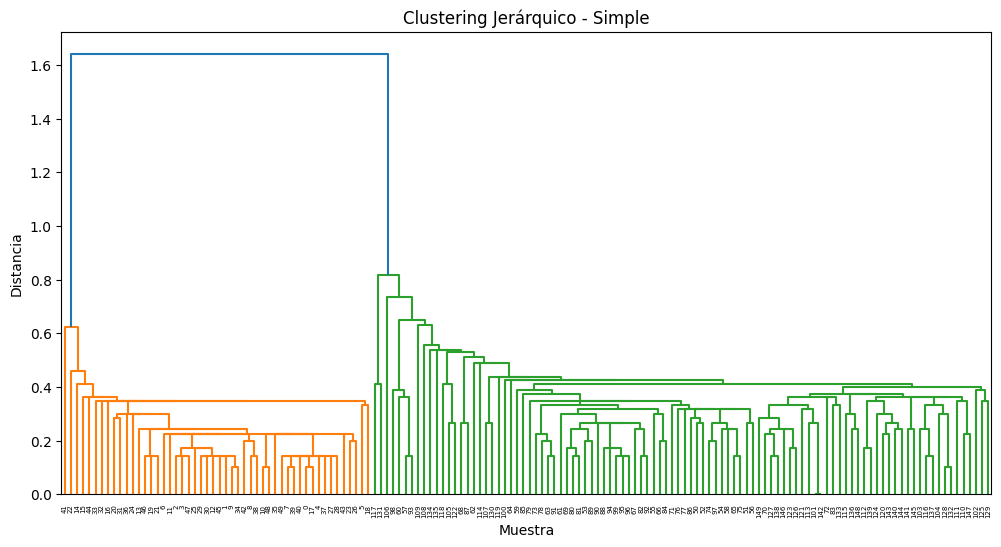

In [ ]:
plt.figure( figsize = ( 12,6 ) )
dendrogram( Z_s )
plt.xlabel( 'Muestra' )
plt.ylabel( 'Distancia' )
plt.title( 'Clustering Jerárquico - Simple')
plt.show()

In [ ]:
iris_hcs = iris.copy()
max_d = 1
clusters = fcluster(Z_s, max_d, criterion = 'distance')
iris_hcs[ 'cluster' ] = pd.Series( clusters ).astype(str)
iris_hcs

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
fighcs = px.scatter ( iris_hcs , x = 'sepal_length', y = 'petal_length', color = 'cluster', template = 'plotly_dark', title = 'Clustering Jerárquico - Simple' )
fighcs.show()

#Z_c

In [ ]:
Z_c = linkage( X, 'complete' )

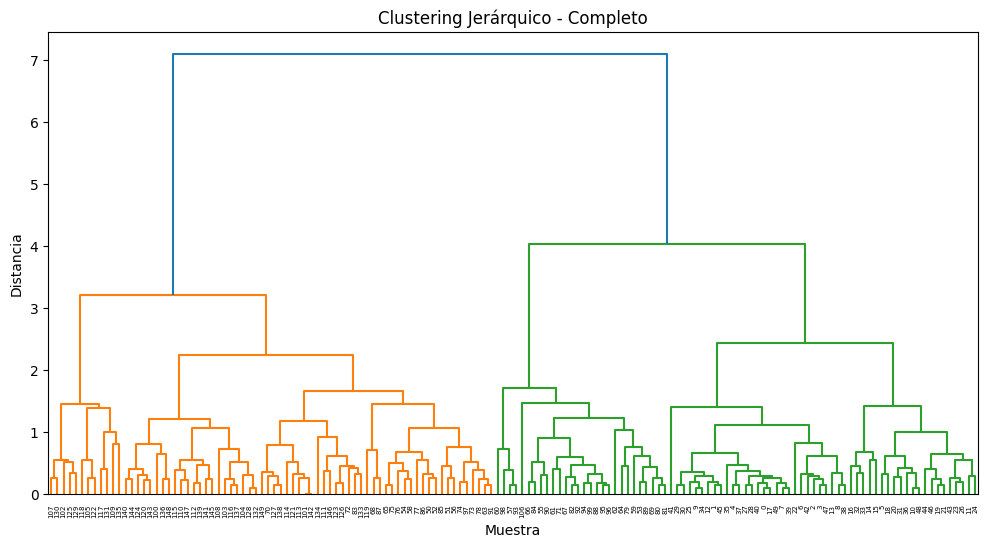

In [ ]:
plt.figure( figsize = ( 12,6 ) )
dendrogram( Z_c )
plt.xlabel( 'Muestra' )
plt.ylabel( 'Distancia' )
plt.title( 'Clustering Jerárquico - Completo')
plt.show()

In [ ]:
iris_hcc = iris.copy()
max_d = 3.211
clusters = fcluster(Z_c, max_d, criterion = 'distance')
iris_hcc[ 'cluster' ] = pd.Series( clusters ).astype(str)

In [ ]:
fighcc = px.scatter ( iris_hcc , x = 'sepal_length', y = 'petal_length', color = 'cluster', template = 'plotly_dark', title = 'Clustering Jerárquico - Completo' )
fighcc.show()

#dbscan

In [ ]:
dbscan = DBSCAN( eps = 0.5, min_samples = 5 )
clusters = dbscan.fit_predict(X)

In [ ]:
iris_dbs = iris.copy()
iris_dbs[ 'cluster' ] = pd.Series( clusters ).astype(str)
figdbs = px.scatter( iris_dbs, x = 'sepal_length', y = 'petal_length', color = 'cluster', template = 'plotly_dark', title = 'DBSCAN Clustering')
figdbs.show()

In [ ]:
# def metrica (x, y):
#   askdjbasjd
#   return asdg

In [ ]:
dbscan1 = DBSCAN( eps = 1
                 , min_samples = 5
                 # , metric = metrica
                )
clusters = dbscan1.fit_predict(X)

iris_dbs1 = iris.copy()
iris_dbs1[ 'cluster' ] = pd.Series( clusters ).astype(str)
figdbs1 = px.scatter( iris_dbs1, x = 'sepal_length', y = 'petal_length', color = 'cluster', template = 'plotly_dark', title = 'DBSCAN Clustering')
figdbs1.show()

#Analisis 4

In [ ]:
corr_matrix = iris.drop( 'species', axis = 1 ).corr()
figcmdbs = px.imshow( corr_matrix, x = corr_matrix.columns, y = corr_matrix.columns, color_continuous_scale = 'RdBu', range_color = [ -1, 1 ]
               , text_auto = True, aspect = 'auto', template = 'plotly_dark' )
figcmdbs.update( layout_coloraxis_showscale = False )
figcmdbs.show()

##PCA

In [ ]:
pca = PCA( n_components = 2 )
X_pca2 = pca.fit_transform(X)
X_pca2

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [ ]:
components = pca.components_
components

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [ ]:
explained_variance = pca.explained_variance_
explained_variance

array([4.22824171, 0.24267075])

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.92461872, 0.05306648])

In [ ]:
explained_variance_ratio.sum()

0.977685206318795

In [ ]:
iris_pca2 = iris.copy()
iris_pca2[ 'PCA1' ] = X_pca2[:,0]
iris_pca2[ 'PCA2' ] = X_pca2[:,1]
iris_pca2

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628


In [ ]:
figpca2 = px.scatter( iris_pca2, x = 'PCA1', y = 'PCA2', color = 'species', title = 'PCA in Iris Dataset', template = 'plotly_dark' )
figpca2.update_layout( xaxis_title = 'Componente Principal 1', yaxis_title = 'Componente Principal 2' )
figpca2.show()

###PCA WCSS

In [ ]:
wcsspca = []

for k in range( 1, 11 ):
  kmeanspca = KMeans( n_clusters = k, random_state = 42, n_init = 10)
  kmeanspca.fit( X_pca2 )
  wcsspca.append( kmeanspca.inertia_ )

fwcsspca = go.Figure()
fwcsspca.add_trace( go.Scatter( x = list( range( 1,11 ) ), y = wcsspca, mode = 'lines+markers', name = 'WCSS' ))
fwcsspca.update_layout(
      title = 'Método del Codo'
    , xaxis_title = 'Número de Clusteres (k)'
    , yaxis_title = 'WCSS'
    , xaxis = dict( tickmode = 'linear', tickvals = list( range( 1, 11) ) )
    , yaxis = dict( rangemode = 'tozero' )
    , template = 'plotly_dark'
)
fwcsspca.show()

###PCA SC

In [ ]:
silhouette_scores_pca = []

for k in range ( 2, 11 ):
  kmeanspca2 = KMeans( n_clusters = k, random_state = 42, n_init = 10 )
  cluster_labels_pca = kmeanspca2.fit_predict( X_pca2 )
  silhouette_scores_pca.append( silhouette_score( X_pca2, cluster_labels_pca ) )

fsspca = go.Figure()
fsspca.add_trace( go.Scatter( x = list( range( 2, 11 ) ), y = silhouette_scores_pca, mode = 'lines+markers', name = 'SC' ) )
fsspca.update_layout(
      title = 'Silhouette Score'
    , xaxis_title = 'Número de Clusteres (k)'
    , yaxis_title = 'SC'
    , xaxis = dict( tickmode = 'linear', tickvals = list( range( 2, 11 ) ) )
    , yaxis = dict( rangemode = 'tozero' )
    , template = 'plotly_dark'
)
fsspca.show()

###PCA KMeans

In [ ]:
kmeans_pca2 = KMeans( n_clusters = 2, random_state = 42, n_init = 10 )
kmeans_pca2.fit( X_pca2 )

KMeans(n_clusters=2, n_init=10, random_state=42)

In [ ]:
iris_pca2[ 'cluster' ] = pd.Series( kmeans_pca2.labels_ ).astype( str )
fkmpca = px.scatter( iris_pca2, x = 'PCA1', y = 'PCA2', color = 'cluster', template = 'plotly_dark', title = 'K Means - PCA 2' )
fkmpca.show()

####Centroids

In [ ]:
centroids = kmeans_pca2.cluster_centers_
centroids = pd.DataFrame( centroids, columns = [ 'PCA1', 'PCA2' ] ).reset_index().rename( columns = { 'index':'cluster' } )
centroids[ 'cluster' ] = centroids.cluster.astype( str )
centroids

,cluster,PCA1,PCA2
0,0,1.386401,-0.069804
1,1,-2.537375,0.127755


In [ ]:
fcentroids = go.Figure()
for k in sorted( iris_pca2.cluster.unique() ):
  fcentroids.add_trace( go.Scatter(
      x = iris_pca2[ iris_pca2.cluster == k ].PCA1
    , y = iris_pca2[ iris_pca2.cluster == k ].PCA2
    , mode = 'markers'
    , name = f'Cluster {k}'
  ) )

fcentroids.add_trace( go.Scatter(
      x = centroids.PCA1
    , y = centroids.PCA2
    , mode = 'markers'
    , name = 'Centroids'
    , marker_color = 'White'
    , marker_size = 8
) )
fcentroids.update_layout(
      title = 'K Means - PCA 2'
    , template = 'plotly_dark'
)
fcentroids.show()

###PCA Z_s

In [ ]:
Z_s_pca = linkage( X_pca2, 'single' )
Z_s_pca

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.15000000e+02, 1.48000000e+02, 4.38546159e-03, 2.00000000e+00],
       [1.70000000e+01, 2.80000000e+01, 8.76406882e-03, 2.00000000e+00],
       [1.60000000e+01, 3.20000000e+01, 2.54762697e-02, 2.00000000e+00],
       [3.70000000e+01, 4.00000000e+01, 3.10066972e-02, 2.00000000e+00],
       [5.10000000e+01, 7.50000000e+01, 3.38769948e-02, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 3.66153702e-02, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 3.66153702e-02, 2.00000000e+00],
       [0.00000000e+00, 1.52000000e+02, 3.66153702e-02, 3.00000000e+00],
       [4.00000000e+00, 1.58000000e+02, 4.51937902e-02, 4.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 4.51937902e-02, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 4.51937902e-02, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 4.51937902e-02, 2.00000000e+00],
       [1.13000000e+02, 1.19000000e+02, 4.80011958e

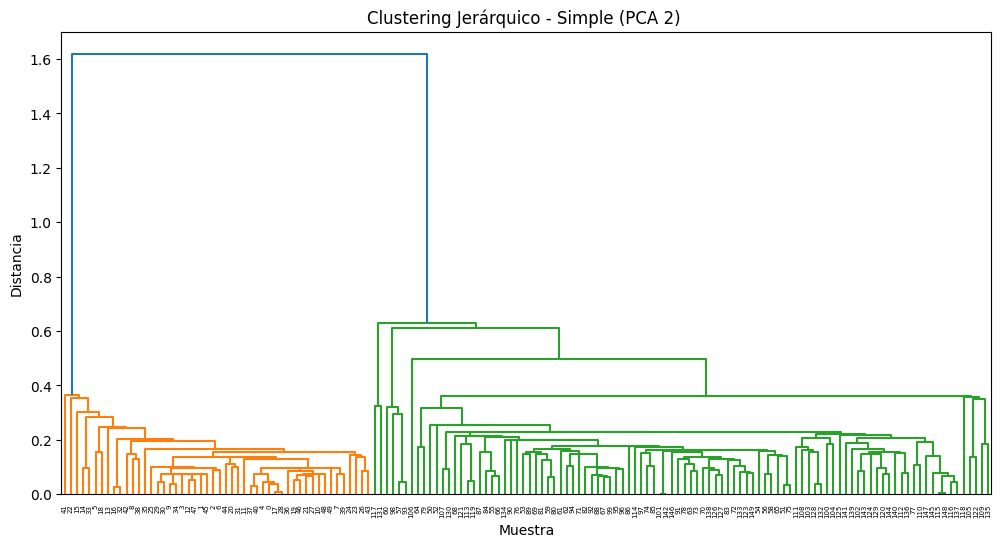

In [ ]:
plt.figure( figsize = ( 12,6 ) )
dendrogram( Z_s_pca )
plt.xlabel( 'Muestra' )
plt.ylabel( 'Distancia' )
plt.title( 'Clustering Jerárquico - Simple (PCA 2) ')
plt.show()

In [ ]:
iris_hcs_pca = iris.copy()
max_d = 1
clusters_pcas = fcluster(Z_s_pca, max_d, criterion = 'distance')
iris_hcs_pca[ 'cluster' ] = pd.Series( clusters_pcas ).astype(str)
iris_hcs_pca

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
fighcspca = px.scatter ( iris_hcs_pca , x = 'sepal_length', y = 'petal_length', color = 'cluster', template = 'plotly_dark', title = 'Clustering Jerárquico - Simple (PCA 2)' )
fighcspca.show()

###PCA Z_c

In [ ]:
Z_c_pca = linkage( X_pca2, 'complete' )

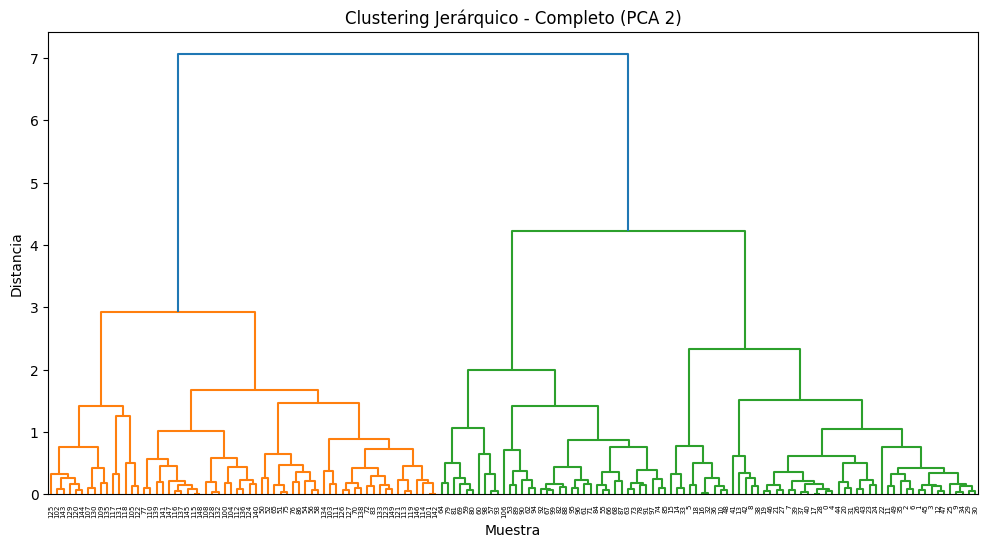

In [ ]:
plt.figure( figsize = ( 12,6 ) )
dendrogram( Z_c_pca )
plt.xlabel( 'Muestra' )
plt.ylabel( 'Distancia' )
plt.title( 'Clustering Jerárquico - Completo (PCA 2)')
plt.show()

In [ ]:
iris_hcc_pca = iris.copy()
max_d = 3.211
clusters_pcac = fcluster(Z_c, max_d, criterion = 'distance')
iris_hcc_pca[ 'cluster' ] = pd.Series( clusters_pcac ).astype(str)

In [ ]:
fighccpca = px.scatter ( iris_hcc_pca , x = 'sepal_length', y = 'petal_length', color = 'cluster', template = 'plotly_dark', title = 'Clustering Jerárquico - Completo (PCA 2)' )
fighccpca.show()

###PCA dbscan

In [ ]:
dbscan_pca = DBSCAN( eps = 0.5, min_samples = 5 )
clusters_pcadb = dbscan_pca.fit_predict( X_pca2 )

In [ ]:
iris_dbs_pca = iris.copy()
iris_dbs_pca[ 'cluster' ] = pd.Series( clusters_pcadb ).astype(str)
figdbspca = px.scatter( iris_dbs_pca, x = 'sepal_length', y = 'petal_length', color = 'cluster', template = 'plotly_dark', title = 'DBSCAN Clustering - PCA 2')
figdbspca.show()

In [ ]:
dbscan1_pca = DBSCAN( eps = 1
                 , min_samples = 5
                 # , metric = metrica
                )
clusters_pcadb1 = dbscan1_pca.fit_predict( X_pca2 )

iris_dbs1_pca = iris.copy()
iris_dbs1_pca[ 'cluster' ] = pd.Series( clusters_pcadb1 ).astype(str)
figdbs1pca = px.scatter( iris_dbs1_pca, x = 'sepal_length', y = 'petal_length', color = 'cluster', template = 'plotly_dark', title = 'DBSCAN Clustering')
figdbs1pca.show()